# Fluxo de trabalho

## bibliotecas (Libraries)

In [1]:
from requests import get
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown
from prettytable import PrettyTable


## Extração (Extract)

In [2]:
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json"

data = get(url).json()

In [3]:
df = pd.DataFrame(data)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


## Transformação (Transform)

In [4]:
df_tmp = pd.DataFrame()
cols_to_remove = []
for col in df.columns:
  res = df.loc[0, col]
  if isinstance(res, dict):
    cols_to_remove.append(col)
    tmp = pd.json_normalize(df[col])
    df_tmp = pd.concat([df_tmp, tmp], axis=1)


display(df_tmp.head())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [5]:
df_expanded = df.drop(columns=cols_to_remove)
df_expanded = pd.concat([df_expanded, df_tmp], axis=1)

In [6]:
df_expanded.shape

(7267, 21)

In [7]:
print("dados duplicados: ", df_expanded.duplicated().sum().sum() > 0)
print("dados vazios: ", df_expanded.isna().sum().sum() > 0)
print("dados nulos: ", df_expanded.isnull().sum().sum() > 0)

df_expanded.describe()

dados duplicados:  False
dados vazios:  False
dados nulos:  False


,SeniorCitizen,tenure,Charges.Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


In [8]:
df_expanded["Charges.Daily"] = df_expanded["Charges.Monthly"]/30

In [9]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)
display(df_expanded.head())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.Daily
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,2.796667


In [10]:
cols_to_replace = []
for col in df_expanded.columns:
  if "Yes" in df_expanded[col].values and "No" in df_expanded[col].values:
    cols_to_replace.append(col)

df_expanded[cols_to_replace]

,Churn,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling
0,No,Yes,Yes,Yes,No,No,Yes,No,Yes,Yes,No,Yes
1,No,No,No,Yes,Yes,No,No,No,No,No,Yes,No
2,Yes,No,No,Yes,No,No,No,Yes,No,No,No,Yes
3,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes
4,Yes,Yes,No,Yes,No,No,No,No,Yes,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
7262,No,No,No,Yes,No,Yes,No,No,Yes,No,No,No
7263,Yes,Yes,No,Yes,Yes,No,No,No,No,No,Yes,Yes
7264,No,No,No,Yes,No,No,Yes,No,No,No,No,Yes
7265,No,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,Yes,No


In [11]:
[print(col, df_expanded[col].unique() ) for col in cols_to_replace]

Churn ['No' 'Yes' '']
Partner ['Yes' 'No']
Dependents ['Yes' 'No']
PhoneService ['Yes' 'No']
MultipleLines ['No' 'Yes' 'No phone service']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['Yes' 'No' 'No internet service']
StreamingTV ['Yes' 'No' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
PaperlessBilling ['Yes' 'No']


[None, None, None, None, None, None, None, None, None, None, None, None]

In [12]:
display(df_expanded[df_expanded["Churn"] == ""].head(3)) # retirar os dados não prenchidos se deixaram ou não a empresa 'churn'
df_expanded_clean = df_expanded[df_expanded["Churn"] != ""]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.Daily
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.3,2.633333
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.1,0.663333
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,Yes,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.2,1.958333


In [13]:
def clean_row(data):
  for col in cols_to_replace:
    if data[col] == "Yes":
      data[col] = 1
    else:
      data[col] = 0

  return data
df_final = df_expanded_clean.apply(lambda x: clean_row(x), axis=1)
df_final.head(3)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.Daily
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.4,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333


In [14]:
df_final.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Charges.Monthly,Charges.Daily
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2.158723
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,1.183333
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,3.958333


## Carregar (Load)


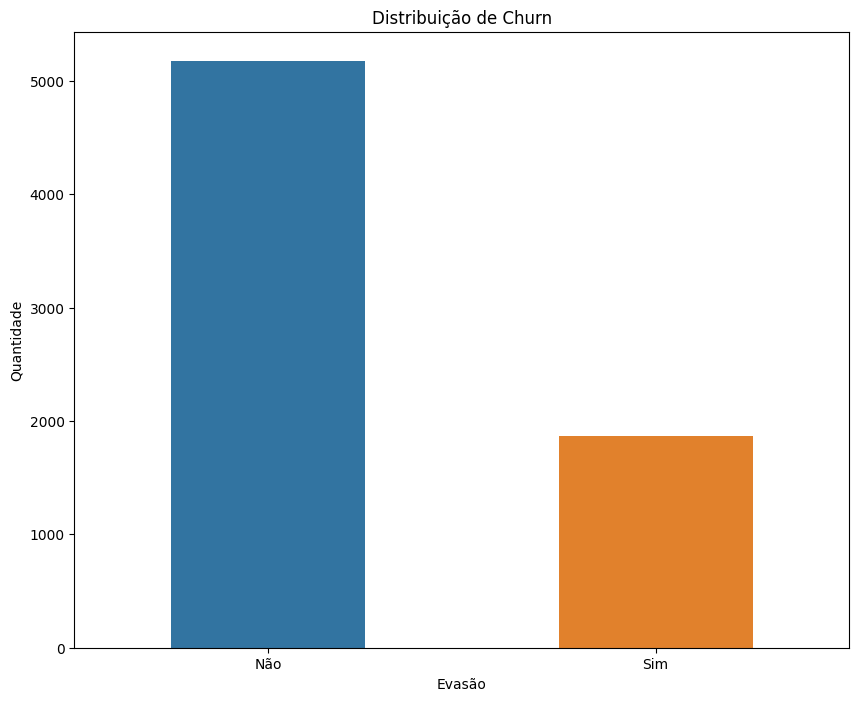

In [15]:

churn_counts = df_final["Churn"].value_counts()

def plot_churn_dist():
  churn_counts = df_final["Churn"].value_counts()
  labels = ["Não", "Sim"]
  plt.figure(figsize=(10, 8))
  sns.barplot(x=labels, y=churn_counts.values, width=.5, hue=labels)
  plt.title("Distribuição de Churn")
  plt.xlabel("Evasão")
  plt.ylabel("Quantidade")
  plt.show()

plot_churn_dist()

In [16]:
# Analise categorica

resultado_categorico = {col: df_final.groupby(["Churn",col])["Churn"].count().rename("Count") for col in ["gender", "SeniorCitizen","Contract","PaymentMethod"] }
resultado_categorico

{'gender': Churn  gender
 0      Female    2549
        Male      2625
 1      Female     939
        Male       930
 Name: Count, dtype: int64,
 'SeniorCitizen': Churn  SeniorCitizen
 0      0                4508
        1                 666
 1      0                1393
        1                 476
 Name: Count, dtype: int64,
 'Contract': Churn  Contract      
 0      Month-to-month    2220
        One year          1307
        Two year          1647
 1      Month-to-month    1655
        One year           166
        Two year            48
 Name: Count, dtype: int64,
 'PaymentMethod': Churn  PaymentMethod            
 0      Bank transfer (automatic)    1286
        Credit card (automatic)      1290
        Electronic check             1294
        Mailed check                 1304
 1      Bank transfer (automatic)     258
        Credit card (automatic)       232
        Electronic check             1071
        Mailed check                  308
 Name: Count, dtype: int64}

In [17]:
# Analise numerica

for col in ['Charges.Monthly', 'Charges.Total','Charges.Daily', 'tenure']:
  df_final[col] = pd.to_numeric(df_final[col], errors="coerce")

In [18]:
#['Charges.Monthly', 'Charges.Total','Contas_Diarias', 'tenure']

resultado_numerico = df_final.groupby("Churn").agg({"Charges.Monthly": ["sum","mean","std"], "Charges.Total": ["sum","mean","std"], "Charges.Daily": ["sum","mean","std"], "tenure": ["sum","mean","std"]})
resultado_numerico

Charges.Monthly                       Charges.Total               \
                  sum       mean        std           sum         mean   
Churn                                                                    
0           316985.75  61.265124  31.092648    13193241.8  2555.344141   
1           139130.85  74.441332  24.666053     2862926.9  1531.796094   

                   Charges.Daily                      tenure             \
               std           sum      mean       std     sum       mean   
Churn                                                                     
0      2329.456984  10566.191667  2.042171  1.036422  194387  37.569965   
1      1890.822994   4637.695000  2.481378  0.822202   33603  17.979133   

                  
             std  
Churn             
0      24.113777  
1      19.531123

In [19]:
resultado_numerico = resultado_numerico[["Charges.Daily", "Charges.Monthly", "Charges.Total", "tenure"]]
resultado_numerico

Charges.Daily                     Charges.Monthly                        \
                sum      mean       std             sum       mean        std   
Churn                                                                           
0      10566.191667  2.042171  1.036422       316985.75  61.265124  31.092648   
1       4637.695000  2.481378  0.822202       139130.85  74.441332  24.666053   

      Charges.Total                            tenure                        
                sum         mean          std     sum       mean        std  
Churn                                                                        
0        13193241.8  2555.344141  2329.456984  194387  37.569965  24.113777  
1         2862926.9  1531.796094  1890.822994   33603  17.979133  19.531123

# Relatório


# Relatório de evasão de clientes
**Autor**: Matheus Pereira Costa

**Data**: 14/06/2025

## Contextualização
De acordo com os ultimos dados obtidos foram percebidos um aumento no número de evasões de clientes devido a esse mótivo foi solicitado um estudo sobre as
possíveis causas e se haveriam alguma relação entre elas.

## Metodologia
A metodologia aplicada para obter os dados foi através da biblioteca requests onde foi feito uma consulta do tipo get na API que se encontra em
[GitHub](https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json).

Após trazer esses dados para dentro do projeto de análise, foi verificado que ele havia **7267 linhas** e **6 colunas**.
Foi transformado em dataframe com a biblioteca do pandas e posteriormente expandidas as colunas que estavam com dados em formato de dicionário usando
`pd.json_normalize`, resultando em um dataframe com **7267 linhas** e **22 colunas**.

## Validação dos Dados
- Não foram encontrados dados nulos ou duplicados
- Padronização de colunas binárias (Yes/No  transformado para formato binominal numérico 1/0)
- Padronização de dados com mais de uma forma de escrita, exemplo (No/No phone service)
- Identificados e removidos **224 casos** com espaços em branco na coluna `Churn`

## Análise Exploratória
- **Taxa de evasão (Churn):** 26.54% do total

## Tabelas de apoio

**Ressalta-se que como os dados binários foram transformados para númericos então em colunas com 0 significa não/não evadiu e 1 sim/evadiu**

### Categóricas


+--------------------------+
|          gender          |
+-------+----------+-------+
| Churn | Category | Value |
+-------+----------+-------+
|   0   |  Female  |  2549 |
|   0   |   Male   |  2625 |
|   1   |  Female  |  939  |
|   1   |   Male   |  930  |
+-------+----------+-------+
+--------------------------+
|      SeniorCitizen       |
+-------+----------+-------+
| Churn | Category | Value |
+-------+----------+-------+
|   0   |    0     |  4508 |
|   0   |    1     |  666  |
|   1   |    0     |  1393 |
|   1   |    1     |  476  |
+-------+----------+-------+
+--------------------------------+
|            Contract            |
+-------+----------------+-------+
| Churn |    Category    | Value |
+-------+----------------+-------+
|   0   | Month-to-month |  2220 |
|   0   |    One year    |  1307 |
|   0   |    Two year    |  1647 |
|   1   | Month-to-month |  1655 |
|   1   |    One year    |  166  |
|   1   |    Two year    |   48  |
+-------+----------------+-------+




### Numéricas



+------------------------------------------------------------+
|                      Charges.Monthly                       |
+-------+-----------+-------------------+--------------------+
| Churn |    Sum    |        Mean       |        Std         |
+-------+-----------+-------------------+--------------------+
|  0.0  | 316985.75 | 61.26512369540008 | 31.09264811934529  |
|  1.0  | 139130.85 | 74.44133226324237 | 24.666053259397444 |
+-------+-----------+-------------------+--------------------+
+--------------------------------------------------------------+
|                        Charges.Total                         |
+-------+------------+--------------------+--------------------+
| Churn |    Sum     |        Mean        |        Std         |
+-------+------------+--------------------+--------------------+
|  0.0  | 13193241.8 | 2555.344141003293  | 2329.4569835604348 |
|  1.0  | 2862926.9  | 1531.7960941680042 | 1890.8229944644058 |
+-------+------------+-------------------



### Correlação

|                  |      Churn |   SeniorCitizen |    Partner |   Dependents |      tenure |   PhoneService |   MultipleLines |   OnlineSecurity |   OnlineBackup |   DeviceProtection |   TechSupport |   StreamingTV |   StreamingMovies |   PaperlessBilling |   Charges.Monthly |   Charges.Total |   Charges.Daily |
|:-----------------|-----------:|----------------:|-----------:|-------------:|------------:|---------------:|----------------:|-----------------:|---------------:|-------------------:|--------------:|--------------:|------------------:|-------------------:|------------------:|----------------:|----------------:|
| Churn            |  1         |       0.150889  | -0.150448  |  -0.164221   | -0.352229   |     0.011942   |       0.0401021 |       -0.171226  |     -0.0822549 |         -0.0661598 |    -0.164674  |     0.0632277 |         0.0613815 |         0.191825   |         0.193356  |      -0.199484  |       0.193356  |
| SeniorCitizen    |  0.150889  |       1         |  0.0164787 |  -0.211185   |  0.0165669  |     0.0085764  |       0.142948  |       -0.0386527 |      0.0665721 |          0.0594285 |    -0.0606246 |     0.105378  |         0.120176  |         0.15653    |         0.220173  |       0.102411  |       0.220173  |
| Partner          | -0.150448  |       0.0164787 |  1         |   0.452676   |  0.379697   |     0.0177057  |       0.142057  |        0.143106  |      0.141498  |          0.153786  |     0.119999  |     0.124666  |         0.117412  |        -0.0148766  |         0.0968479 |       0.319072  |       0.0968479 |
| Dependents       | -0.164221  |      -0.211185  |  0.452676  |   1          |  0.159712   |    -0.00176168 |      -0.0245258 |        0.0809717 |      0.023671  |          0.0139625 |     0.0632681 |    -0.0165577 |        -0.039741  |        -0.111377   |        -0.11389   |       0.0646532 |      -0.11389   |
| tenure           | -0.352229  |       0.0165669 |  0.379697  |   0.159712   |  1          |     0.00844821 |       0.331941  |        0.327203  |      0.360277  |          0.360653  |     0.324221  |     0.279756  |         0.286111  |         0.00615248 |         0.2479    |       0.82588   |       0.2479    |
| PhoneService     |  0.011942  |       0.0085764 |  0.0177057 |  -0.00176168 |  0.00844821 |     1          |       0.27969   |       -0.0928927 |     -0.0523122 |         -0.0712269 |    -0.0963396 |    -0.0225736 |        -0.0329589 |         0.0165048  |         0.247398  |       0.113008  |       0.247398  |
| MultipleLines    |  0.0401021 |       0.142948  |  0.142057  |  -0.0245258  |  0.331941   |     0.27969    |       1         |        0.0981081 |      0.202237  |          0.201137  |     0.100571  |     0.257152  |         0.258751  |         0.16353    |         0.490434  |       0.469042  |       0.490434  |
| OnlineSecurity   | -0.171226  |      -0.0386527 |  0.143106  |   0.0809717  |  0.327203   |    -0.0928927  |       0.0981081 |        1         |      0.283832  |          0.275438  |     0.354931  |     0.176207  |         0.187398  |        -0.0036359  |         0.296594  |       0.412619  |       0.296594  |
| OnlineBackup     | -0.0822549 |       0.0665721 |  0.141498  |   0.023671   |  0.360277   |    -0.0523122  |       0.202237  |        0.283832  |      1         |          0.303546  |     0.294233  |     0.282106  |         0.274501  |         0.126735   |         0.44178   |       0.5101    |       0.44178   |
| DeviceProtection | -0.0661598 |       0.0594285 |  0.153786  |   0.0139625  |  0.360653   |    -0.0712269  |       0.201137  |        0.275438  |      0.303546  |          1         |     0.333313  |     0.390874  |         0.402111  |         0.103797   |         0.482692  |       0.522881  |       0.482692  |
| TechSupport      | -0.164674  |      -0.0606246 |  0.119999  |   0.0632681  |  0.324221   |    -0.0963396  |       0.100571  |        0.354931  |      0.294233  |          0.333313  |     1         |     0.27807   |         0.279358  |         0.0378799  |         0.338304  |       0.432868  |       0.338304  |
| StreamingTV      |  0.0632277 |       0.105378  |  0.124666  |  -0.0165577  |  0.279756   |    -0.0225736  |       0.257152  |        0.176207  |      0.282106  |          0.390874  |     0.27807   |     1         |         0.533094  |         0.223841   |         0.629603  |       0.515709  |       0.629603  |
| StreamingMovies  |  0.0613815 |       0.120176  |  0.117412  |  -0.039741   |  0.286111   |    -0.0329589  |       0.258751  |        0.187398  |      0.274501  |          0.402111  |     0.279358  |     0.533094  |         1         |         0.211716   |         0.627429  |       0.519867  |       0.627429  |
| PaperlessBilling |  0.191825  |       0.15653   | -0.0148766 |  -0.111377   |  0.00615248 |     0.0165048  |       0.16353   |       -0.0036359 |      0.126735  |          0.103797  |     0.0378799 |     0.223841  |         0.211716  |         1          |         0.35215   |       0.15783   |       0.35215   |
| Charges.Monthly  |  0.193356  |       0.220173  |  0.0968479 |  -0.11389    |  0.2479     |     0.247398   |       0.490434  |        0.296594  |      0.44178   |          0.482692  |     0.338304  |     0.629603  |         0.627429  |         0.35215    |         1         |       0.651065  |       1         |
| Charges.Total    | -0.199484  |       0.102411  |  0.319072  |   0.0646532  |  0.82588    |     0.113008   |       0.469042  |        0.412619  |      0.5101    |          0.522881  |     0.432868  |     0.515709  |         0.519867  |         0.15783    |         0.651065  |       1         |       0.651065  |
| Charges.Daily    |  0.193356  |       0.220173  |  0.0968479 |  -0.11389    |  0.2479     |     0.247398   |       0.490434  |        0.296594  |      0.44178   |          0.482692  |     0.338304  |     0.629603  |         0.627429  |         0.35215    |         1         |       0.651065  |       1         |


### Gráficos



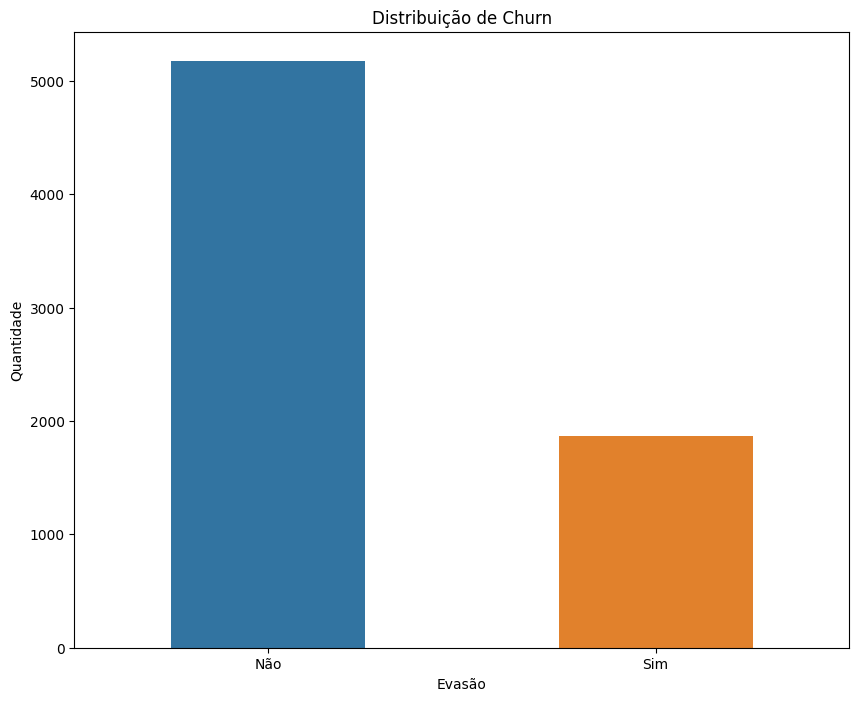


## Conclusão

Ao avaliar os dados, é possível compreender que entre os clientes que deixaram a empresa estão aqueles que possuem o contrato de Month-to-Month representam
88.55% do total que deixaram a empresa.

Outra categoria que trâs dados importantes sobre o caso é o metodo de pagamento ou PaymentMethod, que os que optaram pela modalidade Electronic check
representam 57.30% do total que deixaram a empresa.

A correlação é fraca entre os elementos ao compara-los com a coluna de evasão/Churn.

Portanto, para solucionar o problema sugiro uma revisão nos contratos e na forma de pagemnto sendo eles como  causadores principais de tais efeitos.


In [20]:
relatorio = f"""
# Relatório de evasão de clientes
**Autor**: Matheus Pereira Costa

**Data**: {pd.to_datetime("today").strftime("%d/%m/%Y")}

## Contextualização
De acordo com os ultimos dados obtidos foram percebidos um aumento no número de evasões de clientes devido a esse mótivo foi solicitado um estudo sobre as
possíveis causas e se haveriam alguma relação entre elas.

## Metodologia
A metodologia aplicada para obter os dados foi através da biblioteca requests onde foi feito uma consulta do tipo get na API que se encontra em
[GitHub](https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json).

Após trazer esses dados para dentro do projeto de análise, foi verificado que ele havia **{df.shape[0]} linhas** e **{df.shape[1]} colunas**.
Foi transformado em dataframe com a biblioteca do pandas e posteriormente expandidas as colunas que estavam com dados em formato de dicionário usando
`pd.json_normalize`, resultando em um dataframe com **{df_expanded.shape[0]} linhas** e **{df_expanded.shape[1]} colunas**.

## Validação dos Dados
- Não foram encontrados dados nulos ou duplicados
- Padronização de colunas binárias (Yes/No  transformado para formato binominal numérico 1/0)
- Padronização de dados com mais de uma forma de escrita, exemplo (No/No phone service)
- Identificados e removidos **{sum(df_expanded["Churn"] == "")} casos** com espaços em branco na coluna `Churn`

## Análise Exploratória
- **Taxa de evasão (Churn):** { (churn_counts[1]/churn_counts.sum()) * 100:.2f}% do total

## Tabelas de apoio

**Ressalta-se que como os dados binários foram transformados para númericos então em colunas com 0 significa não/não evadiu e 1 sim/evadiu**

### Categóricas
"""
# Adiciona os resultados categóricos como tabelas formatadas

display(Markdown(relatorio))


for k, v in resultado_categorico.items():
  pt = PrettyTable()
  pt.title = k
  pt.field_names = ["Churn", "Category", "Value"]
  for i, row in v.reset_index().iterrows():
    pt.add_row(row)

  print(pt)


display(Markdown(f"""

### Numéricas

"""))

for k in resultado_numerico.columns.levels[0]:
  pt = PrettyTable()
  pt.title = k
  pt.field_names = ["Churn", "Sum", "Mean","Std"]
  for i, row in resultado_numerico[k].reset_index().iterrows():
    pt.add_row(row)

  print(pt)


cols_to_corr = df_final.select_dtypes(include=['int64', 'float64']).columns

display(Markdown(f"""

### Correlação

{df_final[cols_to_corr].corr().to_markdown(mode="pipe")}


### Gráficos

"""))

plot_churn_dist()



conclusao = f"""
## Conclusão

Ao avaliar os dados, é possível compreender que entre os clientes que deixaram a empresa estão aqueles que possuem o contrato de Month-to-Month representam
{(resultado_categorico["Contract"][1].iloc[0]/resultado_categorico["Contract"][1].sum() ) * 100:.2f}% do total que deixaram a empresa.

Outra categoria que trâs dados importantes sobre o caso é o metodo de pagamento ou PaymentMethod, que os que optaram pela modalidade Electronic check
representam {(resultado_categorico["PaymentMethod"][1].max()/resultado_categorico["Contract"][1].sum() ) * 100:.2f}% do total que deixaram a empresa.

A correlação é fraca entre os elementos ao compara-los com a coluna de evasão/Churn.

Portanto, para solucionar o problema sugiro uma revisão nos contratos e na forma de pagemnto sendo eles como  causadores principais de tais efeitos.
"""

display(Markdown(conclusao))
